In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA

In [87]:
df = pd.read_csv('/Users/juman/Downloads/heart_disease.csv')

In [88]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [90]:
df.rename(columns={'Heart_ stroke': 'Heart_stroke'}, inplace=True)

In [91]:
df[df['education'].isna()].shape

(105, 16)

In [92]:
df[df['cigsPerDay'].isna()].shape

(29, 16)

In [93]:
df[df['BPMeds'].isna()].shape

(53, 16)

In [94]:
df[df['totChol'].isna()].shape

(50, 16)

In [95]:
df[df['BMI'].isna()].shape

(19, 16)

In [96]:
df[df['heartRate'].isna()].shape

(1, 16)

In [97]:
df[df['glucose'].isna()].shape

(388, 16)

In [98]:
105+29+53+50+19+1+388

645

In [99]:
4238-645

3593

In [100]:
645-582

63

In [101]:
4238-3656

582

In [102]:
df.dropna(inplace=True)

In [103]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,Male,58,graduate,0,0.0,0.0,no,1,0,187.0,141.0,81.0,24.96,80.0,81.0,No
4232,Male,68,uneducated,0,0.0,0.0,no,1,0,176.0,168.0,97.0,23.14,60.0,79.0,yes
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No


In [104]:
df['Heart_stroke'] = df['Heart_stroke'].map({'yes': 1, 'No': 0})
df['prevalentStroke'] = df['prevalentStroke'].map({'yes': 1, 'no': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [105]:
df

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,1,39,postgraduate,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,primaryschool,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,uneducated,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,graduate,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,graduate,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,graduate,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,uneducated,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,uneducated,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,graduate,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [106]:
df['education'].unique()

array(['postgraduate', 'primaryschool', 'uneducated', 'graduate'],
      dtype=object)

In [107]:
df_1 = df.loc[:, df.columns!='education']

In [108]:
df_1

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [109]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'Heart_stroke'],
      dtype='object')

In [110]:
#sns.pairplot(df_1)

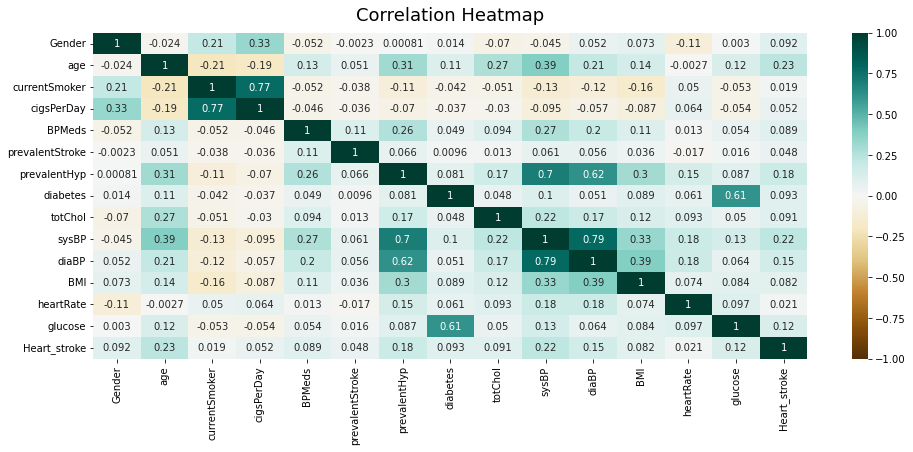

In [111]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_1.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [112]:
df_1.corr()[['Heart_stroke']].sort_values(by='Heart_stroke', ascending=False)

,Heart_stroke
Heart_stroke,1.000000
age,0.233810
sysBP,0.222885
prevalentHyp,0.181556
diaBP,0.150342
glucose,0.121942
diabetes,0.093397
Gender,0.091745
totChol,0.091127
BPMeds,0.089116


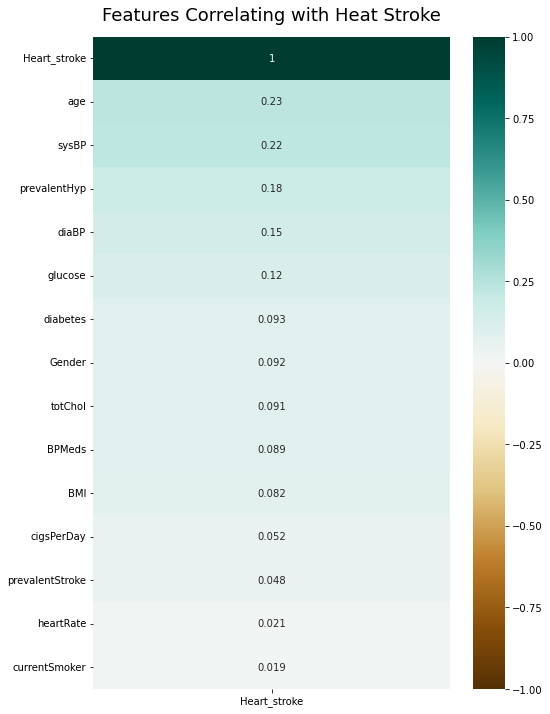

In [113]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_1.corr()[['Heart_stroke']].sort_values(by='Heart_stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Heat Stroke', fontdict={'fontsize':18}, pad=16);

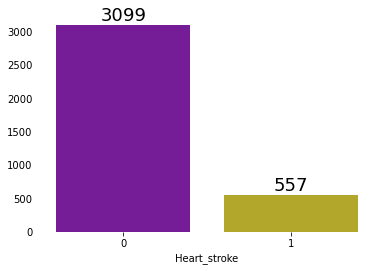

In [114]:
ax=sns.countplot(data=df_1, x='Heart_stroke', palette=['#7d09ab',"#c9ba14"])
ax.bar_label(ax.containers[0], color='black', size=18)
ax.tick_params(left=False) 
ax.set_ylabel(None)

sns.despine(bottom=True, left=True)


In [115]:
x=df_1.iloc[:,:-1]
y=df_1.iloc[:,-1:]

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=0)

Text(0, 0.5, 'Explained Variance')

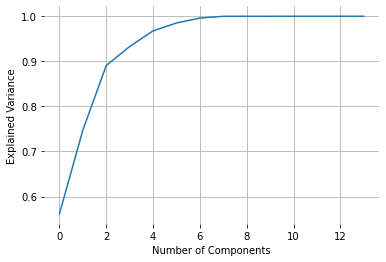

In [117]:
pca = PCA().fit(X_train)
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.grid(True)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [118]:
n = 4 
top_n_pc = pca.components_[:n]
print(f'Top {n} principal component(s):\n{top_n_pc}')

Top 4 principal component(s):
[[-8.08197123e-04  6.06065534e-02 -8.77870493e-04 -1.40552878e-02
   4.51140972e-04  4.62702092e-05  2.34242220e-03  3.07265804e-04
   9.81725017e-01  1.50787151e-01  6.54884221e-02  1.41553281e-02
   3.66728081e-02  6.13784050e-02]
 [-3.32418469e-04  8.81677323e-02 -2.59801446e-03 -5.52319136e-02
   1.11092255e-03  1.36733246e-04  7.84865983e-03  3.35041749e-03
  -1.57561170e-01  5.38721080e-01  2.33442699e-01  4.18511291e-02
   9.68229607e-02  7.80017517e-01]
 [ 3.66579635e-04 -7.68573670e-02  1.97882968e-03  3.03083993e-02
  -1.30057960e-03 -9.84010343e-05 -1.00407939e-02  2.61079402e-03
   9.81415867e-02 -6.85511772e-01 -3.52617378e-01 -4.29423141e-02
  -5.98269352e-02  6.19467901e-01]
 [ 5.63638176e-03 -1.82378017e-01  2.37722635e-02  7.10121313e-01
  -6.80178681e-04 -2.30226289e-04 -4.08578461e-04 -3.67507587e-05
  -1.32893449e-03 -3.80064535e-02  5.59089428e-02 -1.22774162e-02
   6.76118625e-01 -3.03462688e-03]]


In [119]:
#Create a PCA instance and fit the training data
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)

# Fit a logistic regression model using the top n principal components
n_components = 4  # Select the top 2 PCs
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [120]:
classifier = LogisticRegression(random_state=0).fit(X_train_pca, Y_train)

/Users/juman/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [83]:
feature_names = df.columns

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Get the feature names of the top n principal components
n_components = 2  # Select the top 2 PCs
pca = PCA(n_components=n_components)
pca.fit(X_train)
pc_feature_names = [f'PC{i+1}' for i in range(n_components)]
top_n_feature_names = [f'{feature_names[idx]} ({pc_feature_names[pc_idx]})' for idx, pc_idx in enumerate(pca.components_[0])]

# Fit a logistic regression model using the top n principal components
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_pca, y_train)

# Transform the testing data and calculate the accuracy score
X_test_pca = pca.transform(X_test)
y_pred = logreg.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f'Top {n_components} principal components:')
for i, name in enumerate(top_n_feature_names):
    print(f'{i+1}. {name}')
print(f'\nAccuracy score with {n_components} principal components: {accuracy}')

TypeError: list indices must be integers or slices, not numpy.float64

In [121]:
y_pred = classifier.predict(X_test_pca)

In [122]:
print('Accuracy: {:.2f}'.format(classifier.score(Y_test, y_pred)))

/Users/juman/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



ValueError: X has 1 features, but LogisticRegression is expecting 4 features as input.

In [ ]:
print(classification_report(Y_test, y_pred))

In [ ]:
confusion_matrix = confusion_matrix(Y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()